In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
options(scipen=999)

# Sampling registered user revisions to plot out time difference between edits

In [5]:
sample_registered_user_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_registered_user_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [6]:
head(sample_registered_user_revision_session_data[session_index == 374,], n=30)

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index
135599,20140911071930,156801636,20140911071918,20140911060003,20140911084047,374,297,260
5183,20150727220624,236881227,20150727220615,20150727210039,20150727222358,374,224,179
161984,20141212100349,180447160,20141212100348,20141212081127,20141212101711,374,6393,5703
161984,20141212083532,180433788,20141212083531,20141212081127,20141212101711,374,6393,714
1529466,20161230185053,422679375,20161230185052,20161230081837,20161231015713,374,52512,23514
690508,20150526114248,219408497,20150526114246,20150526095356,20150526114539,374,3019,2952
1529466,20161230141943,422603947,20161230141942,20161230081837,20161231015713,374,52512,11445
283443,20151122040549,275720620,20151122040549,20151122032429,20151122051123,374,117,89
201135,20160617054524,348366265,20160617054509,20160617045006,20160617055431,374,74,42
587697,20140322172059,117536508,20140322171911,20140322170020,20140322233106,374,265,24


In [7]:
sample_registered_user_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [8]:
sample_registered_user_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [9]:
sample_registered_user_revision_session_data$time_difference <- as.numeric(sample_registered_user_revision_session_data$updated_timestamp - sample_registered_user_revision_session_data$updated_previous_timestamp)

In [10]:
sample_registered_user_revision_session_data$log_time_difference <- log10(sample_registered_user_revision_session_data$time_difference + 1)

In [11]:
attach(sample_registered_user_revision_session_data)

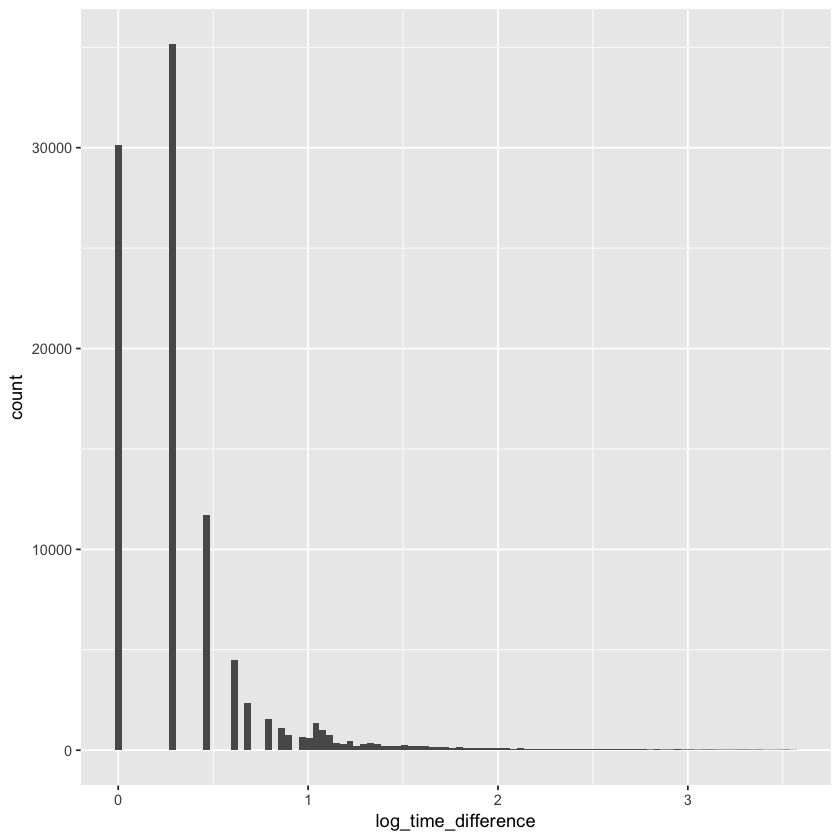

In [12]:
ggplot(sample_registered_user_revision_session_data[prev_timestamp != 'NULL',],aes(x=log_time_difference)) + geom_histogram(bins=100)

In [13]:
detach(sample_registered_user_revision_session_data)

In [14]:
head(sample_registered_user_revision_session_data$updated_timestamp)

[1] "2014-11-05 03:23:06 CST" "2014-10-23 18:34:59 CDT"
[3] "2015-12-31 21:14:48 CST" "2015-11-16 22:11:53 CST"
[5] "2016-10-12 13:23:03 CDT" "2015-05-27 20:05:55 CDT"

In [15]:
head(sample_registered_user_revision_session_data$updated_timestamp.mon)

NULL

In [16]:
# head(sample_registered_user_revision_session_data$updated_timestamp$mon)

In [17]:
head(format(sample_registered_user_revision_session_data$updated_timestamp,"%m"))

[1] "11" "10" "12" "11" "10" "05"

In [18]:
# other types

In [19]:
sample_human_revision_session_data <- data.table(read.table("~/Desktop/human_events.tsv", header=TRUE, sep="\t"))

In [20]:
sample_human_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_human_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [21]:
sample_human_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_human_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [22]:
sample_human_revision_session_data$time_difference <- as.numeric(sample_human_revision_session_data$updated_timestamp - sample_human_revision_session_data$updated_previous_timestamp)

In [23]:
sample_human_revision_session_data$log_time_difference <- log10(sample_human_revision_session_data$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [24]:
attach(sample_human_revision_session_data)

In [25]:
sample_human_revision_session_data_standard_deviation = summarize(group_by(sample_human_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & time_difference >= 0,], user, session_start), standard_deviation = sd(time_difference))

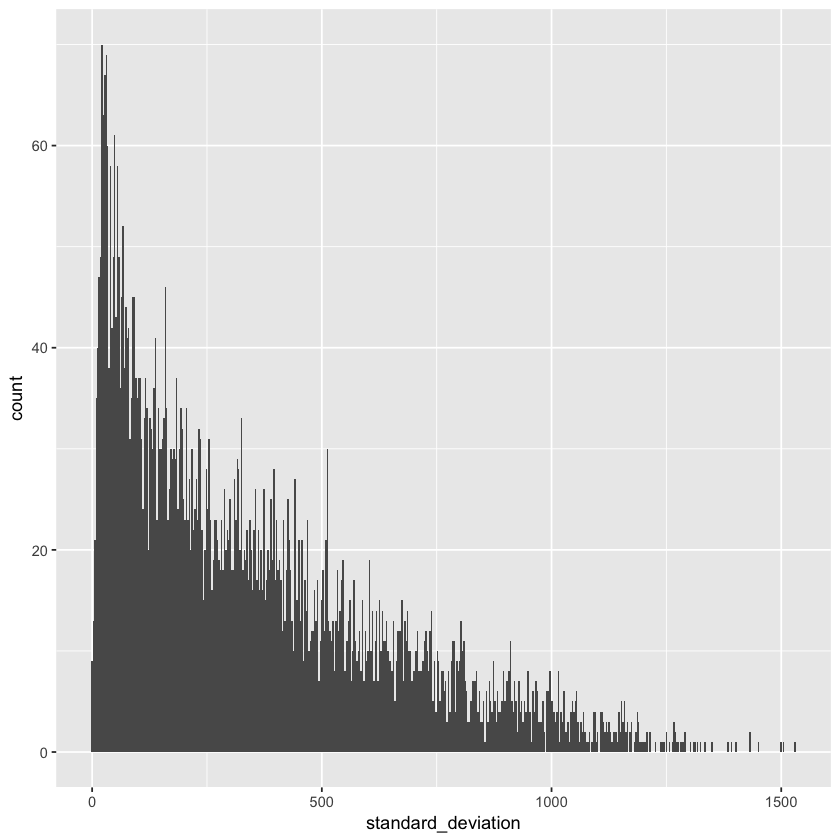

In [26]:
ggplot(sample_human_revision_session_data_standard_deviation,aes(x=standard_deviation)) + geom_histogram(bins=500)

In [27]:
sample_human_revision_session_data$group = 'human'

In [28]:
detach(sample_human_revision_session_data)

In [29]:
sample_bot_revision_session_data <- data.table(read.table("~/Desktop/bot_events.tsv", header=TRUE, sep="\t"))

In [30]:
summary(sample_bot_revision_session_data)

    edit_type            user         timestamp             
 bot_edit:2386536   Min.   : 7801   Min.   :20130402190200  
                    1st Qu.:39601   1st Qu.:20130501054600  
                    Median :39601   Median :20130511195600  
                    Mean   :39600   Mean   :20130540971100  
                    3rd Qu.:39601   3rd Qu.:20130519054300  
                    Max.   :39601   Max.   :20160410205600  
                                                            
  revision_id               prev_timestamp    session_start           
 Min.   : 18777619   NULL          :     72   Min.   :20130402190200  
 1st Qu.: 33162470   20130408231733:      3   1st Qu.:20130430202900  
 Median : 40080592   20130408231757:      3   Median :20130506174100  
 Mean   : 41181630   20130408232129:      3   Mean   :20130530205600  
 3rd Qu.: 43991769   20130408232202:      3   3rd Qu.:20130506174100  
 Max.   :320689112   20130408232822:      3   Max.   :20160410201700  
               

In [31]:
sample_bot_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_bot_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [32]:
sample_bot_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_bot_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [33]:
sample_bot_revision_session_data$time_difference <- as.numeric(sample_bot_revision_session_data$updated_timestamp - sample_bot_revision_session_data$updated_previous_timestamp)

In [34]:
sample_bot_revision_session_data$log_time_difference <- log10(sample_bot_revision_session_data$time_difference + 1)

In [35]:
attach(sample_bot_revision_session_data)

In [36]:
sample_bot_revision_session_data_standard_deviation = summarize(group_by(sample_bot_revision_session_data[prev_timestamp != 'NULL' & time_difference >= 0,], user, session_start), standard_deviation = sd(log_time_difference))

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

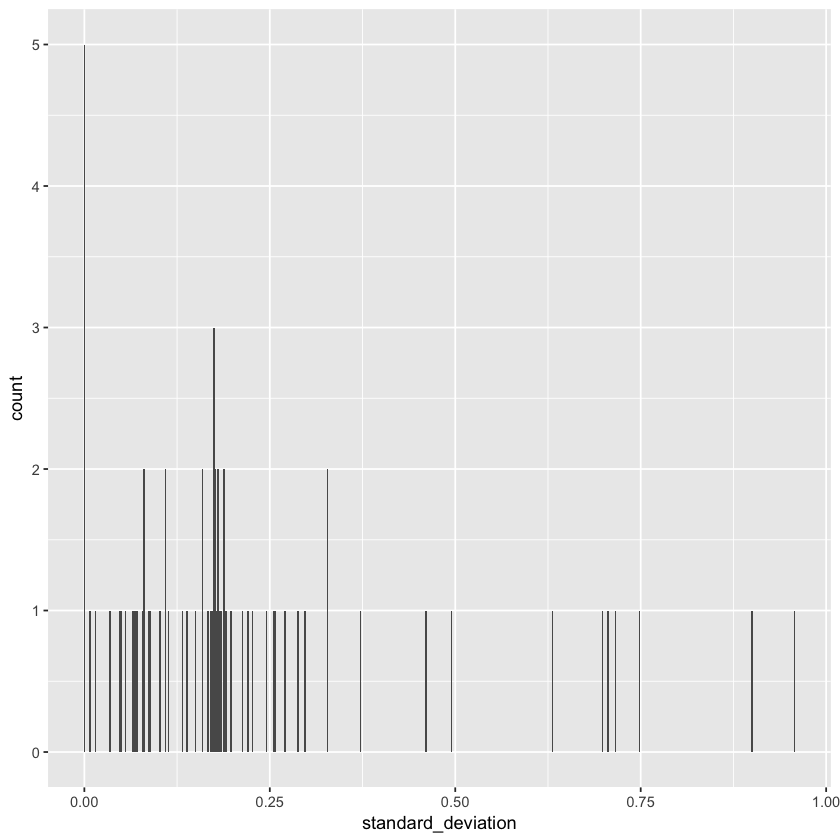

In [37]:
ggplot(sample_bot_revision_session_data_standard_deviation,aes(x=standard_deviation)) + geom_histogram(bins=500)

In [38]:
detach(sample_bot_revision_session_data)

# Sampling anon revisions to plot out time difference between edits

In [39]:
sample_anon_revision_session_data <- data.table(read.table("~/Desktop/revision_session_data.tsv", header=TRUE, sep="\t"))

In [40]:
sample_anon_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [41]:
sample_anon_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [42]:
sample_anon_revision_session_data$time_difference <- as.numeric(sample_anon_revision_session_data$updated_timestamp - sample_anon_revision_session_data$updated_previous_timestamp)

In [43]:
sample_anon_revision_session_data$log_time_difference <- log10(sample_anon_revision_session_data$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [44]:
attach(sample_anon_revision_session_data)

In [45]:
sample_anon_revision_session_data_standard_deviation = summarize(group_by(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & time_difference >= 0,], user, session_start), standard_deviation = sd(time_difference))

In [46]:
sample_human_revision_session_data_standard_deviation$group = 'human'
sample_anon_revision_session_data_standard_deviation$group = 'anon'


In [47]:
sample_human_revision_session_data_standard_deviation$user = as.character(sample_human_revision_session_data_standard_deviation$user)

In [48]:
mean(sample_human_revision_session_data$time_difference <=5, na.rm=TRUE)

[1] 0.1606267

Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

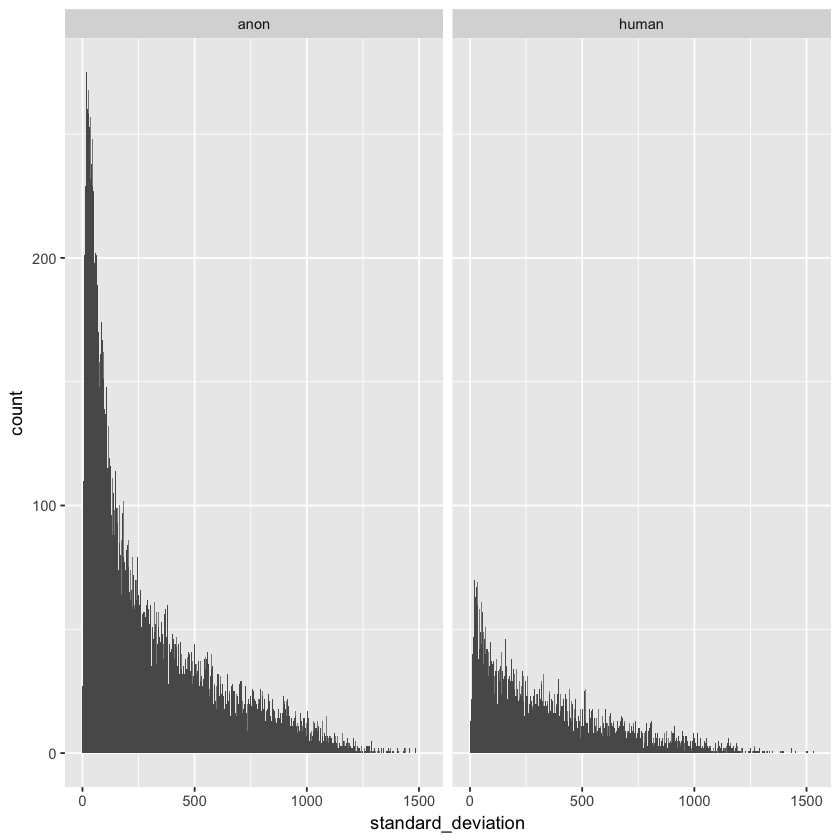

In [49]:
ggplot(rbind(sample_human_revision_session_data_standard_deviation,sample_anon_revision_session_data_standard_deviation),aes(x=standard_deviation)) + facet_wrap(~group) + geom_histogram(bins=500)

In [50]:
sample_anon_revision_session_data_standard_deviation[sample_anon_revision_session_data_standard_deviation$user == '150.254.210.213',]

user,session_start,standard_deviation,group
150.254.210.213,20130701235102,1.4222247,anon
150.254.210.213,20130717091320,28.0561463,anon
150.254.210.213,20130829091540,42.7298052,anon
150.254.210.213,20130829202421,90.1354179,anon
150.254.210.213,20130830070801,74.2705446,anon
150.254.210.213,20130831005116,0.6380553,anon


In [51]:
head(sample_anon_revision_session_data_standard_deviation[order(sample_anon_revision_session_data_standard_deviation$standard_deviation),])

user,session_start,standard_deviation,group
76.8.204.187,20130309173737,0.0000000,anon
91.198.174.211,20121202050457,0.0000000,anon
127.0.0.1,20121029181848,0.2425356,anon
46.176.86.251,20130322092028,0.3631365,anon
112.203.160.147,20130623071509,0.4746342,anon
144.32.179.16,20130225140126,0.6002450,anon


In [52]:
sample_anon_revision_session_mean = summarize(group_by(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & time_difference >= 0,], user), mean_log_time_difference = mean(log_time_difference))

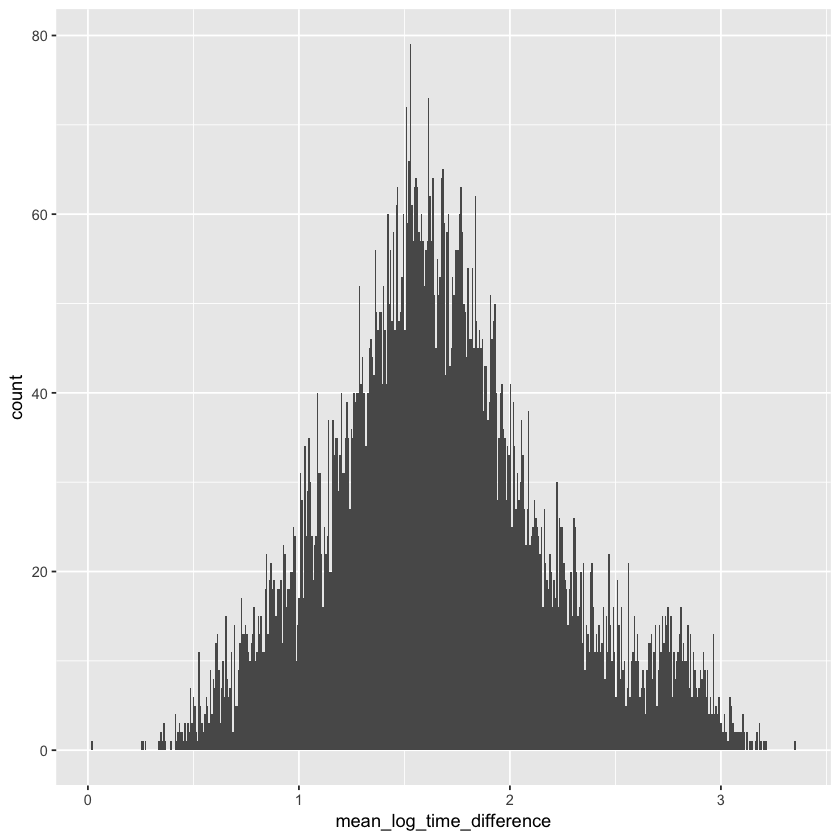

In [53]:
ggplot(sample_anon_revision_session_mean,aes(x=mean_log_time_difference)) + geom_histogram(bins=500)

In [54]:
nrow(sample_anon_revision_session_data[timestamp == prev_timestamp,])

[1] 20756

In [55]:
nrow(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & is.na(log_time_difference),])

[1] 1

In [56]:
head(sample_anon_revision_session_data)

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference
93.220.76.159,20121029172824,25,NULL,20121029172824,20121029181646,0,2,0,2012-10-29 17:28:24,NA,NA,NA
93.220.76.159,20121029181646,102,20121029172824,20121029172824,20121029181646,0,2,1,2012-10-29 18:16:46,2012-10-29 17:28:24,2902,3.462847
193.40.10.178,20121029174206,54,NULL,20121029174206,20121029180514,0,4,0,2012-10-29 17:42:06,NA,NA,NA
193.40.10.178,20121029174358,56,20121029174206,20121029174206,20121029180514,0,4,1,2012-10-29 17:43:58,2012-10-29 17:42:06,112,2.053078
193.40.10.178,20121029174425,58,20121029174358,20121029174206,20121029180514,0,4,2,2012-10-29 17:44:25,2012-10-29 17:43:58,27,1.447158
193.40.10.178,20121029180514,71,20121029174425,20121029174206,20121029180514,0,4,3,2012-10-29 18:05:14,2012-10-29 17:44:25,1249,3.096910


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

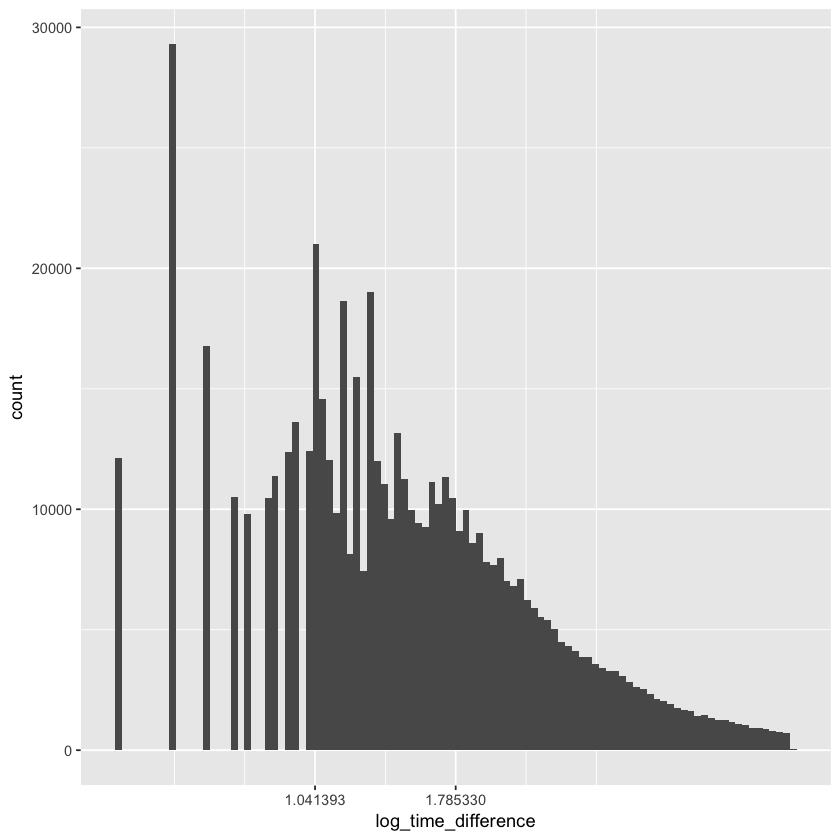

In [57]:
ggplot(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10,],aes(x=log_time_difference)) +
geom_histogram(bins=100) + 
scale_x_continuous(breaks=log10(c(10,60) + 1))

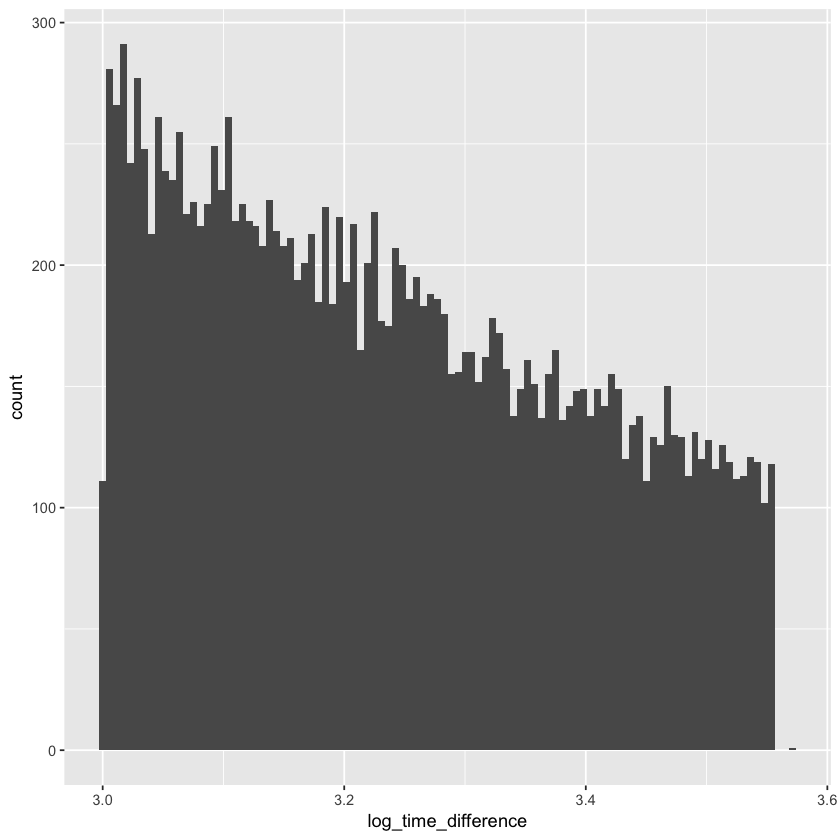

In [58]:
# just between 1 and 2
ggplot(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 3,],aes(x=log_time_difference)) + geom_histogram(bins=100)

In [59]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 0 &  log_time_difference == 0,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference


In [60]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference == .3010300,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference


In [61]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference == .4771213,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference


In [62]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 0 &  log_time_difference <= .5,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference
127.0.0.1,20121029181849,116,20121029181848,20121029181848,20121029181849,0,18,12,2012-10-29 18:18:49,2012-10-29 18:18:48,1,0.3010300
151.41.160.140,20121030221544,12935,20121030221542,20121030221531,20121030221607,0,18,3,2012-10-30 22:15:44,2012-10-30 22:15:42,2,0.4771213
151.41.160.140,20121030221551,12941,20121030221549,20121030221531,20121030221607,0,18,5,2012-10-30 22:15:51,2012-10-30 22:15:49,2,0.4771213
151.41.160.140,20121030221552,12942,20121030221551,20121030221531,20121030221607,0,18,6,2012-10-30 22:15:52,2012-10-30 22:15:51,1,0.3010300
151.41.160.140,20121030221554,12943,20121030221552,20121030221531,20121030221607,0,18,7,2012-10-30 22:15:54,2012-10-30 22:15:52,2,0.4771213
151.41.160.140,20121030221555,12944,20121030221554,20121030221531,20121030221607,0,18,8,2012-10-30 22:15:55,2012-10-30 22:15:54,1,0.3010300


In [63]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 1 &  log_time_difference <= 1.05,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference
84.98.132.83,20121030144547,4001,20121030144537,20121030143235,20121030144649,0,17,15,2012-10-30 14:45:47,2012-10-30 14:45:37,10,1.041393
217.255.27.137,20121101120837,274381,20121101120827,20121101115902,20121101120837,0,21,20,2012-11-01 12:08:37,2012-11-01 12:08:27,10,1.041393
93.146.216.252,20121104084102,318625,20121104084052,20121104083404,20121104084211,0,20,17,2012-11-04 08:41:02,2012-11-04 08:40:52,10,1.041393
81.249.226.3,20121104140945,321967,20121104140935,20121104140117,20121104143551,0,144,32,2012-11-04 14:09:45,2012-11-04 14:09:35,10,1.041393
81.249.226.3,20121104141522,322057,20121104141512,20121104140117,20121104143551,0,144,50,2012-11-04 14:15:22,2012-11-04 14:15:12,10,1.041393
81.249.226.3,20121104142014,322122,20121104142004,20121104140117,20121104143551,0,144,70,2012-11-04 14:20:14,2012-11-04 14:20:04,10,1.041393


In [64]:
sample(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 1.31 &  log_time_difference <= 1.325,],10)

event_index,revision_id,timestamp,prev_timestamp,session_index,session_start,session_events,time_difference,updated_previous_timestamp,session_end
19,8429,20121030185534,20121030185514,1,20121030183050,30,20,2012-10-30 18:55:14,20121030195713
15,135422,20121031125524,20121031125504,0,20121031124637,22,20,2012-10-31 12:55:04,20121031125653
20,268471,20121031220445,20121031220425,3,20121031213746,34,20,2012-10-31 22:04:25,20121031223006
3,274223,20121101120013,20121101115953,0,20121101115902,21,20,2012-11-01 11:59:53,20121101120837
19,274379,20121101120827,20121101120807,0,20121101115902,21,20,2012-11-01 12:08:07,20121101120837
9,294319,20121102152355,20121102152335,0,20121102151029,11,20,2012-11-02 15:23:35,20121102152440
2,305913,20121103053935,20121103053915,8,20121103053856,12,20,2012-11-03 05:39:15,20121103055107
10,321874,20121104140330,20121104140310,0,20121104140117,144,20,2012-11-04 14:03:10,20121104143551
17,321897,20121104140553,20121104140533,0,20121104140117,144,20,2012-11-04 14:05:33,20121104143551
63,322102,20121104141845,20121104141825,0,20121104140117,144,20,2012-11-04 14:18:25,20121104143551


In [65]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 3,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference
91.86.14.28,20121030150809,4231,20121030144223,20121030144223,20121030151457,0,11,1,2012-10-30 15:08:09,2012-10-30 14:42:23,1546,3.189490
88.153.45.108,20121030195619,9788,20121030191416,20121030183050,20121030195713,1,30,27,2012-10-30 19:56:19,2012-10-30 19:14:16,2523,3.402089
93.220.68.150,20121030220909,12731,20121030214544,20121030213050,20121030221017,1,11,9,2012-10-30 22:09:09,2012-10-30 21:45:44,1405,3.147985
93.220.101.47,20121106171027,344138,20121106164653,20121106164620,20121106171246,0,13,4,2012-11-06 17:10:27,2012-11-06 16:46:53,1414,3.150756
83.206.120.18,20121107175156,356133,20121107171149,20121107165853,20121107175756,3,16,12,2012-11-07 17:51:56,2012-11-07 17:11:49,2407,3.381656
130.88.141.34,20121109171610,376234,20121109165425,20121109162207,20121109172253,3,59,51,2012-11-09 17:16:10,2012-11-09 16:54:25,1305,3.115943


In [66]:
detach(sample_anon_revision_session_data)